In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn import svm
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [2]:
heart_disease = pd.read_csv('heart_disease_dataset.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
horse = pd.read_csv('horse_colic_dataset.csv')
horse.head()

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,surgical_lesion,site_of_lesion,type_of_lesion,subtype_of_lesion,code_of_lesion,outcome
0,2,1,38.5,66,28,3,3,-100000,2,5,...,45.0,8.4,-100000,-100000.0,2,11,3,0,0,2
1,1,1,39.2,88,20,-100000,-100000,4,1,3,...,50.0,85.0,2,2.0,2,2,2,0,8,3
2,2,1,38.3,40,24,1,1,3,1,3,...,33.0,6.7,-100000,-100000.0,2,0,0,0,0,1
3,1,2,39.1,164,84,4,1,6,2,2,...,48.0,7.2,3,5.3,1,2,2,0,8,2
4,2,1,37.3,104,35,-100000,-100000,6,2,-100000,...,74.0,7.4,-100000,-100000.0,2,4,3,0,0,2


In [4]:
horse_attributes_description = pd.read_csv('attributes_horse_colic.csv')
horse_attributes_description

,name,type,description
0,surgery,integer,"1 = Yes, it had surgery, 2 = It was treated wi..."
1,age,integer,"1 = Adult horse, 2 = Young (< 6 months)"
2,rectal_temperature,float,linear; in degrees celsius; An elevated temp m...
3,pulse,integer,linear; the heart rate in beats per minute; is...
4,respiratory_rate,integer,usefulness is doubtful due to the great fluctu...
5,temperature_of_extremities,integer,a subjective indication of peripheral circulat...
6,peripheral_pulse,integer,"possible values are: 1 = normal, 2 = increased..."
7,mucous_membranes,integer,a subjective measurement of colour; possible v...
8,capillary_refill_time,integer,"a clinical judgement. The longer the refill, t..."
9,pain,integer,a subjective judgement of the horse's pain lev...


In [5]:
horse.describe()

,surgery,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,pain,...,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,surgical_lesion,site_of_lesion,type_of_lesion,subtype_of_lesion,code_of_lesion,outcome
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,...,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,-542.070652,1.076087,-18719.015761,-6999.459239,-19268.845109,-17661.103261,-22552.828804,-13041.013587,-10868.413043,-17117.154891,...,-10013.281522,-11662.905978,-52716.423913,-63857.630163,1.369565,-269.111413,-270.282609,-271.298913,-268.508152,-541.959239
std,7362.151438,0.265498,39099.282006,25677.350743,39526.014643,38188.384358,41851.695129,33724.923729,31168.477607,37720.364703,...,30127.020471,32175.601542,49995.099051,48107.812940,0.483344,5212.998135,5212.936598,5212.883402,5213.030204,7362.159705
min,-100000.000000,1.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,...,-100000.000000,-100000.000000,-100000.000000,-100000.000000,1.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000,-100000.000000
25%,1.000000,1.000000,37.200000,48.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,36.000000,6.100000,-100000.000000,-100000.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,38.000000,60.000000,21.500000,2.000000,1.000000,2.500000,1.000000,2.000000,...,43.000000,7.150000,-100000.000000,-100000.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000
75%,2.000000,1.000000,38.400000,86.000000,35.000000,3.000000,3.000000,4.000000,2.000000,4.000000,...,50.000000,54.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,5.000000,2.000000
max,2.000000,2.000000,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,2.000000,5.000000,...,75.000000,89.000000,3.000000,10.100000,2.000000,11.000000,4.000000,3.000000,10.000000,3.000000


In [6]:
horse.isnull().sum()

surgery                        0
age                            0
rectal_temperature             0
pulse                          0
respiratory_rate               0
temperature_of_extremities     0
peripheral_pulse               0
mucous_membranes               0
capillary_refill_time          0
pain                           0
peristalsis                    0
abdominal_distension           0
nasogastric_tube               0
nasogastric_reflux             0
nasogastric_reflux_PH          0
rectal_examination             0
abdomen                        0
packed_cell_volume             0
total_protein                  0
abdominocentesis_appearance    0
abdomcentesis_total_protein    0
surgical_lesion                0
site_of_lesion                 0
type_of_lesion                 0
subtype_of_lesion              0
code_of_lesion                 0
outcome                        0
dtype: int64

In [7]:
horse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 27 columns):
surgery                        368 non-null int64
age                            368 non-null int64
rectal_temperature             368 non-null float64
pulse                          368 non-null int64
respiratory_rate               368 non-null int64
temperature_of_extremities     368 non-null int64
peripheral_pulse               368 non-null int64
mucous_membranes               368 non-null int64
capillary_refill_time          368 non-null int64
pain                           368 non-null int64
peristalsis                    368 non-null int64
abdominal_distension           368 non-null int64
nasogastric_tube               368 non-null int64
nasogastric_reflux             368 non-null int64
nasogastric_reflux_PH          368 non-null float64
rectal_examination             368 non-null int64
abdomen                        368 non-null int64
packed_cell_volume             368 non-nu

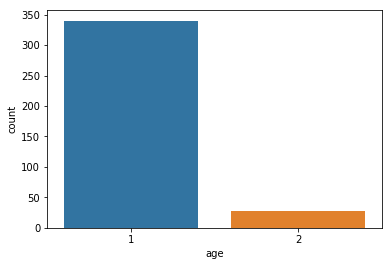

In [8]:
sns.countplot(horse['age'])


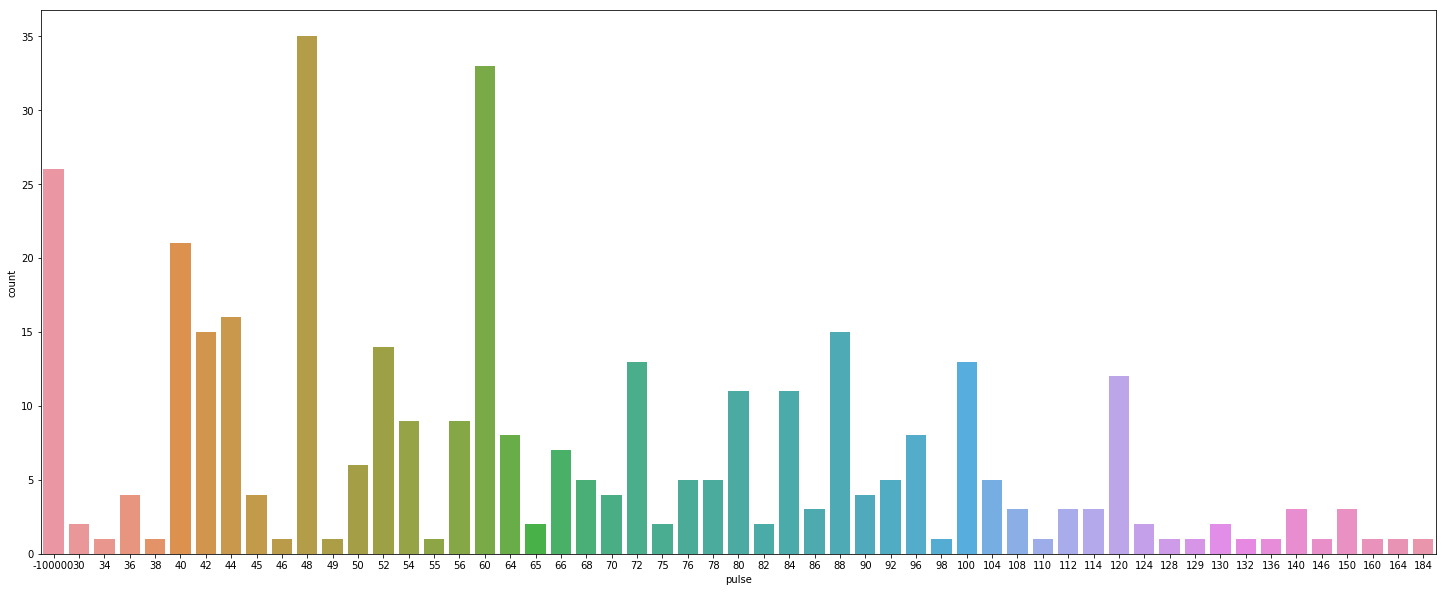

In [9]:
plt.figure(figsize=(25,10))
sns.countplot(horse['pulse'])

In [10]:
horse['pulse'].isnull().sum()

0

In [ ]:
bins = (2, 120, 184) # quaility is between 2 and 8 (actually 3-9). 
# just 2 bins of quality / good and bad/ exact index of 8 - 0 to 8
# 6.5 - spread, we need a higher quality 
group_names= ['0', '1']
horse['pulse']=pd.cut(horse['pulse'], bins=bins, labels=group_names)
# cutting the quality and replacing it
horse['pulse'].unique()

In [11]:
horse['pulse'].isnull().sum()

0

In [12]:
label_quality = LabelEncoder()
horse['age']=label_quality.fit_transform(horse['age']) 

In [13]:
X = horse.drop('age', axis=1)
y= horse['age']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\Users\katya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\katya\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\katya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
rfc=RandomForestClassifier(n_estimators=200) # how many models are in, how many forests :)
#used for medium size dataset 
rfc.fit(X_train, y_train)
#our features and quality
pred_rfc=rfc.predict(X_test)

In [16]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        64
           1       1.00      0.30      0.46        10

   micro avg       0.91      0.91      0.91        74
   macro avg       0.95      0.65      0.70        74
weighted avg       0.91      0.91      0.88        74

[[64  0]
 [ 7  3]]


In [18]:
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf=clf.predict(X_test)
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        64
           1       0.00      0.00      0.00        10

   micro avg       0.86      0.86      0.86        74
   macro avg       0.43      0.50      0.46        74
weighted avg       0.75      0.86      0.80        74

[[64  0]
 [10  0]]


C:\Users\katya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\katya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\katya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc=mlpc.predict(X_test)
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        64
           1       0.00      0.00      0.00        10

   micro avg       0.84      0.84      0.84        74
   macro avg       0.43      0.48      0.46        74
weighted avg       0.74      0.84      0.79        74

[[62  2]
 [10  0]]


C:\Users\katya\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
